<a href="https://colab.research.google.com/github/gao42/PyProjects/blob/main/train_lenet_geo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train the Geometry Classification Model (LeNet Model).
#####     Usage:
#####     python train_model.py --dataset dataset --model output/lenet.hdf5

In [1]:
# Tools: Unzip the pyimagesearch tools

!unzip -qq "/content/pyimagesearch.zip" -d "/content"


In [7]:
# Data: Unzip the data set to be used

!unzip -qq "/content/dataset_geo.zip" -d "/content"

In [3]:
!pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25837 sha256=c79df3bfc92e947a9ff33bff08863b6e68db79e2b0cedeacaec75f2a43ecf74d
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils


In [4]:
# Import: import the necessary packages.
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import SGD
from pyimagesearch.nn.conv import LeNet
from pyimagesearch.utils.captchahelper import preprocess
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

In [8]:
# Arguments: construct the argument parse and parse the arguments.

#ap = argparse.ArgumentParser()
#ap.add_argument("-d", "--dataset", required=True,
#	help="path to input dataset")
#ap.add_argument("-m", "--model", required=True,
#	help="path to output model")
#args = vars(ap.parse_args())

args = {
	  "dataset": "dataset_geo",
    "model": "lenet_geo.hdf5"
}

In [9]:
# Preprocess: in a loop load, preprocess scale each image.

data = []
labels = []

for imagePath in paths.list_images(args["dataset"]):
	# load the image, pre-process it, and store it in the data list
	image = cv2.imread(imagePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	#image = preprocess(image, 28, 28)
	image = preprocess(image, 640, 640)
	image = img_to_array(image)
	data.append(image)

	# extract the class label from the image path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [10]:
# Preprocess: split and transform the dataset.

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=63)

# convert the labels from integers to vectors
lb = LabelBinarizer().fit(trainY)
trainY = lb.transform(trainY)
testY = lb.transform(testY)

In [11]:
# Initialize: initialize the model

print("[INFO] compiling model...")
#model = LeNet.build(width=28, height=28, depth=1, classes=9)
model = LeNet.build(width=640, height=640, depth=1, classes=12)
opt = SGD(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


In [ ]:
# Train: train the network
print("[INFO] training network...")
H = model.fit(trainX, trainY,  validation_data=(testX, testY),
	batch_size=32, epochs=30, verbose=1)

[INFO] training network...
Epoch 1/30
18/18 [==============================] - 214s 12s/step - loss: 2.6169 - accuracy: 0.0896 - val_loss: 2.4571 - val_accuracy: 0.0546
Epoch 2/30
18/18 [==============================] - 206s 11s/step - loss: 2.3727 - accuracy: 0.1554 - val_loss: 2.3795 - val_accuracy: 0.2022
Epoch 3/30
18/18 [==============================] - 206s 11s/step - loss: 2.2386 - accuracy: 0.3016 - val_loss: 2.2319 - val_accuracy: 0.1967
Epoch 4/30
18/18 [==============================] - 205s 11s/step - loss: 2.0134 - accuracy: 0.3565 - val_loss: 2.8715 - val_accuracy: 0.2131
Epoch 5/30
18/18 [==============================] - 206s 11s/step - loss: 1.8769 - accuracy: 0.3931 - val_loss: 2.4318 - val_accuracy: 0.1749
Epoch 6/30
18/18 [==============================] - 206s 11s/step - loss: 1.6309 - accuracy: 0.4808 - val_loss: 2.6772 - val_accuracy: 0.3770
Epoch 7/30
18/18 [==============================] - 206s 11s/step - loss: 1.6225 - accuracy: 0.5155 - val_loss: 1.7906 - 

In [ ]:
# Results: evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

In [ ]:
# Save: save the model to disk
print("[INFO] serializing network...")
model.save(args["model"])

[INFO] serializing network...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


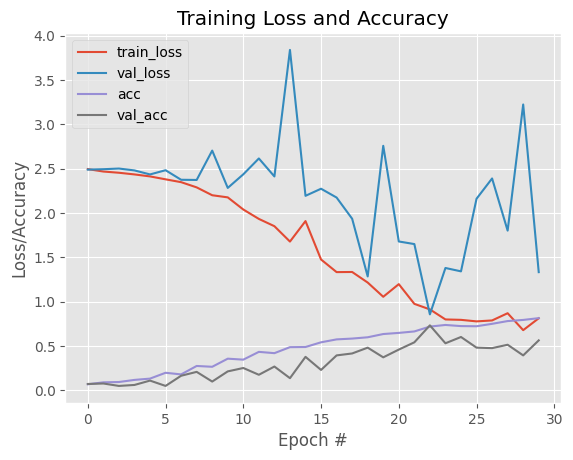

In [10]:
# Results: plot the training + testing loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 30), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 30), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 30), H.history["accuracy"], label="acc")
plt.plot(np.arange(0, 30), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()